# Catalog Tools: How To

<div class="alert alert-block alert-info">
    
#### In this notebook we will show how to:

<ol>
    <li>Download catalogs</li>
    <li>Generate synthetic earthquakes</li>
    <li>Bin magnitudes</li>
    <li>Calculate b-values</li>
</ol>

## 0. Import general packages and catalog tools
<font color=#208de2> In the main package, the analytic tools are available (b-value estimation), while other funcitons as catalog downloads, general functions and plotting are defined as subpackages. </font>

In [3]:
#%matplotlib widget
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


# catalog tools

# analysis
from catalog_tools import estimate_beta_elst
from catalog_tools import estimate_beta_utsu
from catalog_tools import estimate_beta_tinti
from catalog_tools import estimate_beta_laplace

# download
from catalog_tools import download_catalog_sed
from catalog_tools import prepare_sed_catalog

# plots
from catalog_tools import plot_cum_fmd
from catalog_tools import plot_fmd

# utils
from catalog_tools import bin_to_precision
from catalog_tools import simulate_magnitudes

## 1. Download catalog

<font color=#208de2> Swiss Catalog. Start date and end date have to be defined as a datetime. </font>

In [4]:
start_time = pd.to_datetime('2022/01/01')
end_time = dt.datetime.now()
min_magnitude = 0.5

df = download_catalog_sed(start_time=start_time, end_time=end_time, min_magnitude=min_magnitude)
df = prepare_sed_catalog(df, convert_to_mw=False)

<font color=#208de2> The output is a dataframe: </font>

In [5]:
df.tail()

,#EventID,time,latitude,longitude,depth,Author,Catalog,Contributor,ContributorID,mag_type,magnitude,MagAuthor,EventLocationName,event_type
6,smi:ch.ethz.sed/sc20a/Event/2023bztene,2023-01-29 04:26:46.302547,46.045869,6.906665,5.2,vsimon@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023bztene,MLhc,1.0,vsimon@sc20ag,Chamonix F,earthquake
5,smi:ch.ethz.sed/sc20a/Event/2023cacmgg,2023-01-29 09:07:17.278718,47.168178,9.440325,2.8,vsimon@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023cacmgg,MLhc,1.0,vsimon@sc20ag,Buchs SG,earthquake
4,smi:ch.ethz.sed/sc20a/Event/2023ceawhi,2023-01-31 12:36:45.308483,48.281636,7.656022,10.8,vsimon@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023ceawhi,MLhc,1.7,vsimon@sc20ag,Colmar F,earthquake
2,smi:ch.ethz.sed/sc20a/Event/2023cerrlm,2023-01-31 21:03:43.636245,45.892226,6.893018,3.0,vsimon@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023cerrlm,MLhc,0.6,vsimon@sc20ag,Chamonix F,earthquake
1,smi:ch.ethz.sed/sc20a/Event/2023cgjqje,2023-02-01 19:10:05.755205,47.374415,6.921971,5.6,vsimon@sc20ag,NaN,SED,smi:ch.ethz.sed/sc20a/Event/2023cgjqje,MLhc,1.9,vsimon@sc20ag,Porrentruy JU,earthquake


<font color=#208de2> We can plot the cumulative frequency-magnitude distribution (FMD): </font>

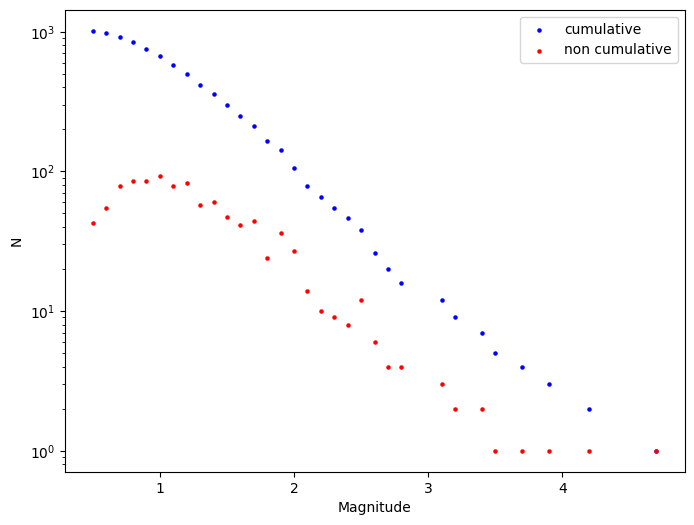

In [6]:
font = {'size': 10}
matplotlib.rc('font', **font)
ax = plt.subplots(figsize=(8, 6))[1]
plot_cum_fmd(ax, df['magnitude'], color='blue')
plot_fmd(ax, df['magnitude'], color='red')

ax.legend(['cumulative', 'non cumulative'])

## 2. Generate synthetic earthquakes
<font color=#208de2> First we need to define the number of earthquakes, the b-value and the completeness magnitude. For the b-value, note that beta is defined as the natural logarithm equivalent of the b-value. </font>

In [166]:
n = 200
b_value = 1
beta = b_value*np.log(10)
delta_m = 0.1
mc = 3
mc_generation = mc - delta_m / 2

<font color=#208de2> Now we can generate a synthetic magnitude distribution: </font>

In [167]:
mags = simulate_magnitudes(n,beta,mc_generation)

## 3. Bin magnitudes
<font color=#208de2> In order to bin the magnitudes, we just need to define the step-size: </font>

In [168]:
mags_binned = bin_to_precision(mags, delta_m)

## 4. Calculate b-values
<font color=#208de2> We estimate the b-value from the binned sample. It is important to pass on the information of which binning (if any) is applied. Also, be cautious that beta is (as above) a factor of np.log(10) different to the b-value. </font>

In [169]:
beta_estimate = estimate_beta_tinti(mags_binned, mc=mc, delta_m=delta_m)
# beta_estimate = estimate_beta_utsu(mags_binned,mc=mc, delta_m=delta_m)
# beta_estimate = estimate_beta_elst(mags_binned, delta_m=delta_m)
# beta_estimate = estimate_beta_laplace(mags_binned, delta_m=delta_m)

<font color=#208de2> We can plot the original and binned magnitudes and their respective b-value estimates now. Note that the data are offset by half the binning size so that the cumulative number is shown correctly. </font>

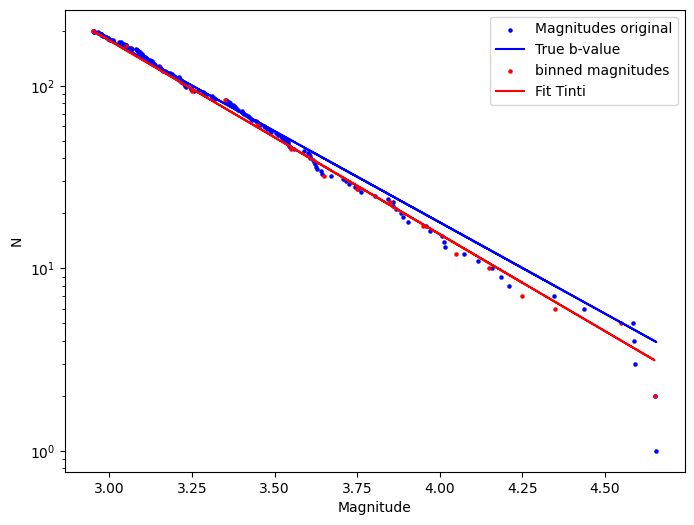

In [170]:
font = {'size': 10}
matplotlib.rc('font', **font)
ax = plt.subplots(figsize=(8, 6))[1]

plot_cum_fmd(ax, mags, color='blue', b_value=b_value, mc=mc - delta_m/2)
plot_cum_fmd(ax, mags_binned, color='red', b_value=beta_estimate/np.log(10), delta_m=delta_m)

ax.legend(['Magnitudes original', 'True b-value', 'binned magnitudes', 'Fit Tinti'])